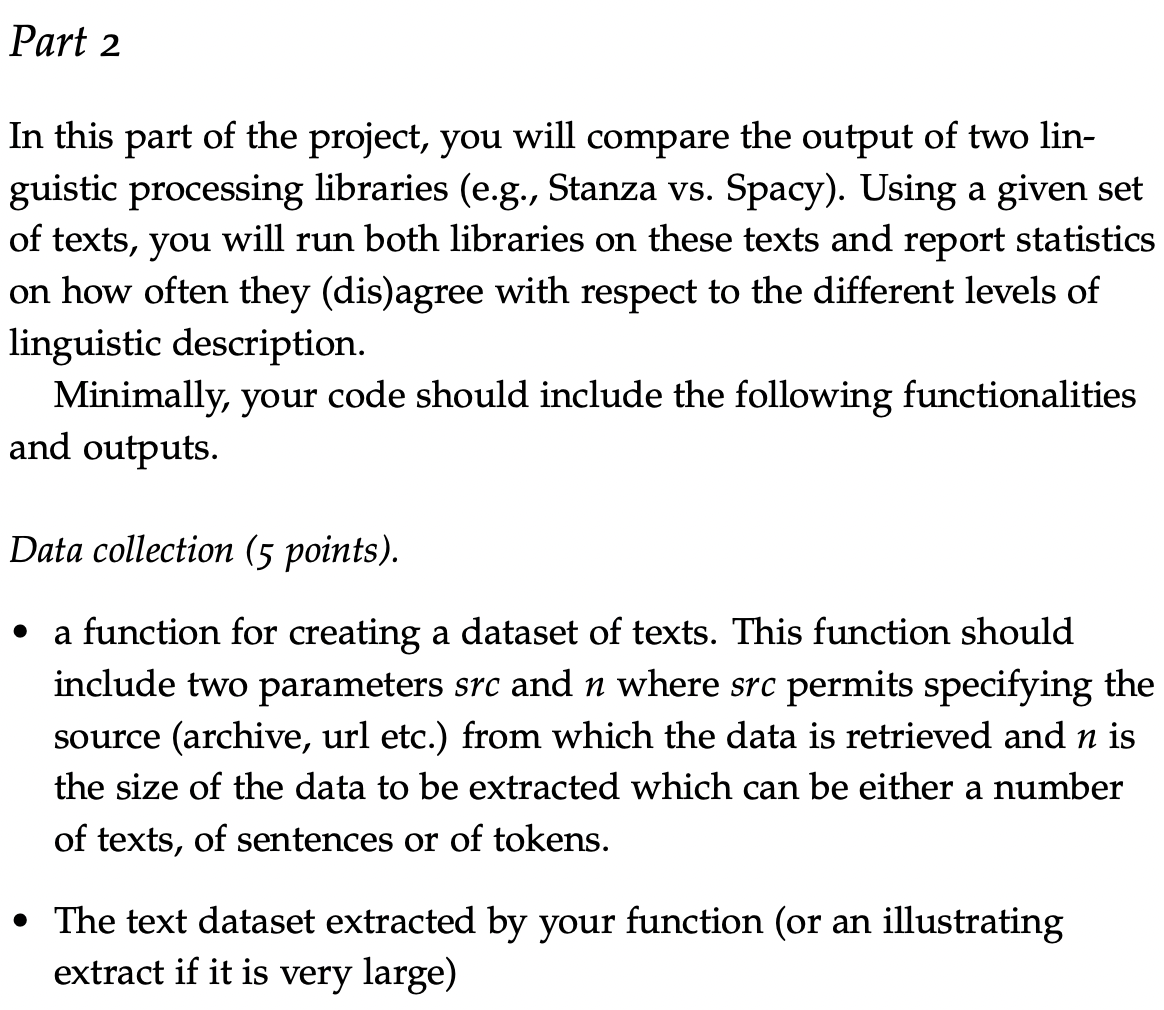

In [1]:
! pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=c2b6835a4f9ece5cfd04e90293d673a0248210c4e2bb2b0f13b5c76fdddd899c
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
import requests
from bs4 import BeautifulSoup
import random
import string
import nltk
import zipfile
import wikipedia

In [3]:
def create_dataset(src, n):
    if "wikipedia.org" in src:
        dataset = data_from_url(src, n)
    elif src[-4:] == '.zip' and src[:4] != 'http':
      dataset = data_from_archive(n)
    else:
        raise ValueError("Invalid source specified. Please choose 'archive' or 'url'.")
    return dataset

In [4]:
def data_from_archive(path_to_zip_file, n):
    '''
    Code to retrieve data from an archive source
    '''
    dataset = []
    count = 0

    with zipfile.ZipFile(path_to_zip_file, 'r') as f:
      for name in f.namelist():
          data = f.read(name)
          if count < n:
            dataset.append(data)
            count += 1
          else:
            break

    return dataset

def data_from_url(path_to_url, n):
    '''
    Code to retrieve data from a URL source
    '''  
    dataset = []
    count = 0

    page = wikipedia.page(path_to_url)
    content = page.content
    dataset.append(content)
    
    all_links = page.links
    for link in all_links:
      if count < n-1:
        try:
          page = wikipedia.page(title=link)
          content = page.content
          dataset.append(content)
          count += 1
        except: pass
      else:
        break
    
    return dataset

In [11]:
page = wikipedia.page("https://en.wikipedia.org/wiki/List_of_philosophers_born_in_the_15th_and_16th_centuries")
all_links = page.links
all_links

['AB De Villiers',
 'Abel Boyer',
 'Abel Poupin',
 'Abolitionism in France',
 'Abolitionism in the United States',
 'Abraham Bosse',
 'Abraham Faure',
 'Abraham Humbert',
 'Abraham Jeudiome',
 'Abraham Levesque',
 'Abraham Mazel',
 'Abraham Salle',
 'Abraham de Klerk',
 'Abraham de Moivre',
 'Adam Riveriz',
 'Adolf Galland',
 'Adolph Malan',
 'Adolph Menzel',
 'Adolphe Landré',
 'Adolphe Monod',
 'Adèle Kamm',
 'Aegidius Jean Blignaut',
 'Afrikaans',
 "Agrippa d'Aubigné",
 'Al Gore',
 'Alain Bombard',
 'Alain Boyer',
 'Alain Juppé',
 'Alan Shepard',
 'Albert Rivett (pastor)',
 'Albert Réville',
 'Albert Schweitzer',
 'Albert Thibaudet',
 'Alexander Hamilton',
 'Alexander du Toit',
 'Alexander von Humboldt',
 'Alexandre Olivier Exquemelin',
 'Alexandre Vinet',
 'Alexis Soyer',
 'Alfred-Henri Chaber',
 'Alfred Ainger',
 'Alfred Casalis',
 'Alfred Dupont',
 'Alfred Gardyne de Chastelain',
 'Alice Cooper',
 'Alice Krige',
 'Aline Dieleman',
 'Alonzo Garcelon',
 'Alphonse de Vignolles',
 'A

In [8]:
src = "https://en.wikipedia.org/wiki/List_of_philosophers_born_in_the_15th_and_16th_centuries"
n = 5

dataset = create_dataset(src, n)
print(dataset)

['Some notable French Huguenots or people with French Huguenot ancestry include:\n\n\n== Actors and film-makers ==\nJames Agee (1909–1955), American screenwriter, Pulitzer Prize-winning author.\nRené Allio (1924–1995), French film-maker.\nHumphrey Bogart (1899–1957), American actor, descended from Huguenot refugees in the Netherlands.\nDion Boucicault (1820–1890), Irish actor and playwright.\nMarlon Brando (1924–2004), American actor, descended from  Chretien DuBois of the Comté of Coupigny, near Lille in Artois.\nGodfrey Cass (1867-1951), Australian actor, descendant of the Castieau family.\nChristopher Cazenove (1943–2010), English actor.\nTimothée Chalamet (1995–), French-American actor.\nCharlie Chaplin (1889-1977), British actor, likely to have had Huguenot ancestry but this has not yet been fully confirmed.\nCyd Charisse (1921-2008), American actress and dancer.\nJessica Chastain (1977–), American actress, Academy Award winner for Best Actress 2022,  descended from Dr Pierre Chas

In [9]:
dataset[1]

'Abel Boyer (1667? – 16 November 1729) was a French-English lexicographer, journalist and miscellaneous writer.\n\n\n== Biography ==\nAbel Boyer was probably born on 24 June 1667 at Castres, in Upper Languedoc, southern France. His father, Pierre Boyer, one of the two consuls or chief magistrates of Castres, had been suspended and fined for his Protestantism. Boyer\'s education at the academy of Puylaurens was interrupted by the religious disturbances, and leaving France with his maternal uncle Pierre Campdomerc, a noted Huguenot preacher, he finished his studies at Franeker in Friesland, after a brief episode, it is said, of military service in Holland. Proceeding to England in 1689 he fell into great poverty, and is represented as transcribing and preparing for the press Dr. Thomas Smith\'s edition of William Camden\'s Latin correspondence (London, 1691). A good classical scholar, Boyer became in 1692 tutor to Allen Bathurst, afterwards first Earl Bathurst, whose father Sir Benjamin 